In [1]:
# uncomment if gensim is installed
#!pip install gensim
import gensim
# Need the interactive Tools for Matplotlib
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn.manifold import TSNE

In [3]:
# load pre-trained word2vec embeddings
# The embeddings can be downloaded from command prompt:
# wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

In [4]:
# Test the loaded word2vec model in gensim
# We will need the raw vector for a word
print(model['computer']) 

# We will also need to get the words closest to a word
model.similar_by_word('computer')

[  1.07421875e-01  -2.01171875e-01   1.23046875e-01   2.11914062e-01
  -9.13085938e-02   2.16796875e-01  -1.31835938e-01   8.30078125e-02
   2.02148438e-01   4.78515625e-02   3.66210938e-02  -2.45361328e-02
   2.39257812e-02  -1.60156250e-01  -2.61230469e-02   9.71679688e-02
  -6.34765625e-02   1.84570312e-01   1.70898438e-01  -1.63085938e-01
  -1.09375000e-01   1.49414062e-01  -4.65393066e-04   9.61914062e-02
   1.68945312e-01   2.60925293e-03   8.93554688e-02   6.49414062e-02
   3.56445312e-02  -6.93359375e-02  -1.46484375e-01  -1.21093750e-01
  -2.27539062e-01   2.45361328e-02  -1.24511719e-01  -3.18359375e-01
  -2.20703125e-01   1.30859375e-01   3.66210938e-02  -3.63769531e-02
  -1.13281250e-01   1.95312500e-01   9.76562500e-02   1.26953125e-01
   6.59179688e-02   6.93359375e-02   1.02539062e-02   1.75781250e-01
  -1.68945312e-01   1.21307373e-03  -2.98828125e-01  -1.15234375e-01
   5.66406250e-02  -1.77734375e-01  -2.08984375e-01   1.76757812e-01
   2.38037109e-02  -2.57812500e-01

[('computers', 0.7979379892349243),
 ('laptop', 0.6640493273735046),
 ('laptop_computer', 0.6548868417739868),
 ('Computer', 0.6473335027694702),
 ('com_puter', 0.6082079410552979),
 ('technician_Leonard_Luchko', 0.5662748217582703),
 ('mainframes_minicomputers', 0.5617721080780029),
 ('laptop_computers', 0.5585449934005737),
 ('PC', 0.5539618730545044),
 ('maker_Dell_DELL.O', 0.5519254207611084)]

In [5]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,300), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.similar_by_word(word)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()


 


<IPython.core.display.Javascript object>


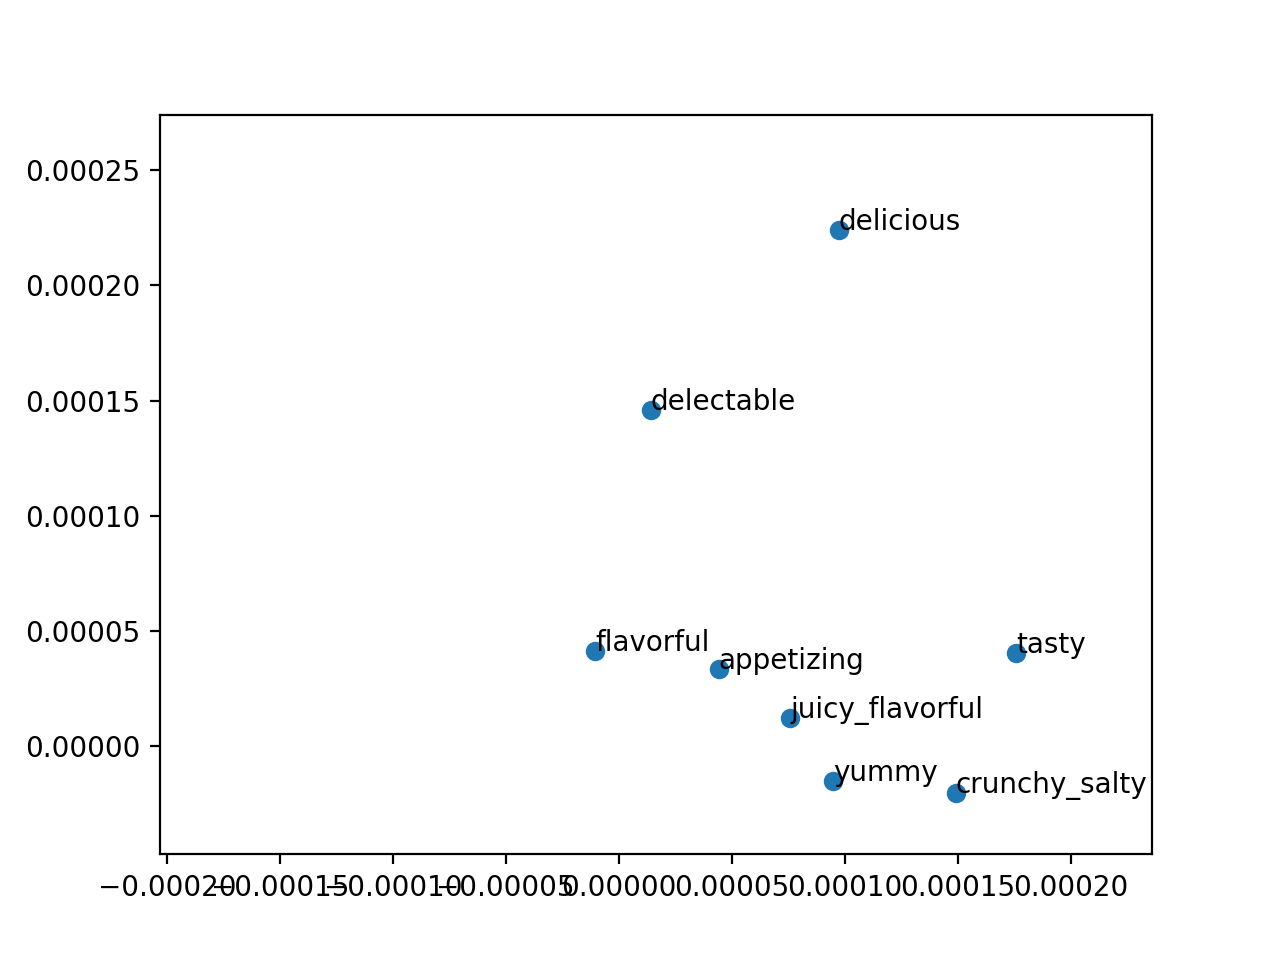

In [25]:
display_closestwords_tsnescatterplot(model, 'tasty')